# Using OpenCV to detect circles

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.svm as skl_svm
import sklearn.cross_validation as skl_cv
import seaborn as sns
import os
import sys
import cv2

base_path = '/home/lundi/Python/MNIST/'
sys.path.append(base_path + '/libraries/')

import MNIST_data_processor as mdp

MNIST_data_processor = mdp.MNIST_data_processor()

from matplotlib.patches import Ellipse

In [2]:
def convert_to_img(index):
    img = np.zeros((28, 28,3))
    img[:,:,0] = X.ix[index].reshape(28,28)
    img[:,:,1] = X.ix[index].reshape(28,28)
    img[:,:,2] = X.ix[index].reshape(28,28)
    
    return img

In [3]:
X, y = MNIST_data_processor.load_subset_data()

[[[ 13.5         13.5          5.14781523]]]


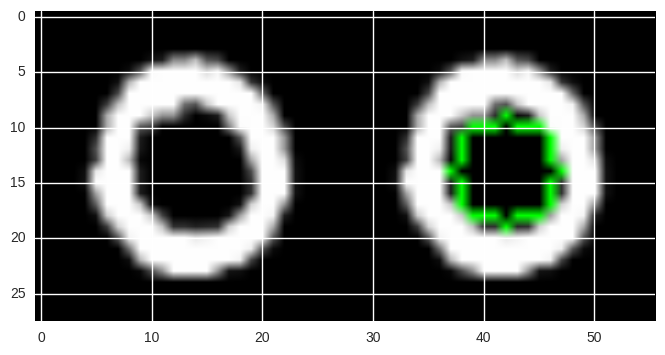

In [4]:
image = convert_to_img(1)
image = image.astype('uint8')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
output = image.copy()
circles = cv2.HoughCircles(gray, cv2.cv.CV_HOUGH_GRADIENT,dp = 1, minDist = 3,
                            param1=50,param2=10,minRadius=0,maxRadius=0)
print circles
# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
 
    # loop over the (x, y) coordinates and radius of the circles
    for (x_circle, y_circle, r_circle) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circles
        cv2.circle(output, (x_circle, y_circle), r_circle, (0, 255, 0), 1)
 
    # show the output image
    plt.imshow(np.hstack([image, output]))
    #plt.axis('off');

This works, let's loop through all zeros to make sure it's working

In [49]:
zero_indexes = ( y == 8 )
X_zeros = X.loc[zero_indexes].head(15)

W: 6.61155891418
H: 8.46291923523
W: 3.46816802025
H: 8.39139652252
W: 2.82842707634
H: 2.82842707634
W: 11.9412069321
H: 23.8294239044

W: 5.0438284874
H: 11.0018157959
W: 4.54625225067
H: 9.13088417053
W: 8.84029006958
H: 21.7856693268

W: 5.84668588638
H: 9.80639457703
W: 4.63809871674
H: 10.6874265671
W: 8.87743091583
H: 26.3247261047

W: 4.40922307968
H: 7.56866788864
W: 4.75640392303
H: 6.4200334549
W: 10.9608411789
H: 23.2353534698

W: 4.68033790588
H: 10.0421600342
W: 6.21937608719
H: 7.34586334229
W: 10.6726531982
H: 21.9296283722

W: 7.09524726868
H: 14.5986871719
W: 6.25164365768
H: 12.1276664734
W: 12.7903995514
H: 19.6790981293

W: 4.51363801956
H: 7.89634466171
W: 6.42527580261
H: 10.2660694122
W: 10.1237869263
H: 23.9934310913

W: 3.16227769852
H: 3.16227769852
W: 4.89013004303
H: 15.1863336563
W: 8.46693515778
H: 19.8036346436

W: 2.44948983192
H: 2.44948983192
W: 4.85295248032
H: 5.89405918121
W: 14.9165620804
H: 18.3849754333

W: 3.31961154938
H: 6.98199272156
W: 3.77

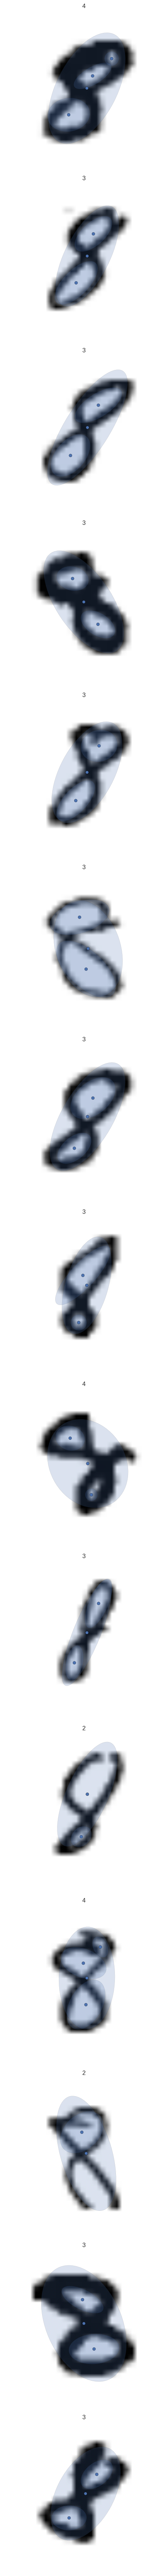

In [50]:
plt.figure(figsize=(5, 6 * X_zeros.shape[0]))
contour_counts = []

for index, current_zero_index in enumerate(X_zeros.index):
    image = convert_to_img(current_zero_index)
    image = image.astype('uint8')

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    output = image.copy()

    plt.subplot(X_zeros.shape[0], 1, (index+1))
    # ensure at least some circles were found
    
    ret,thresh = cv2.threshold(gray,127,255,0)
    contours,hierarchy = cv2.findContours(thresh, 1, 2)
    current_contour_count = 0
    for cnt in contours:
        if len(cnt) >= 5:
            current_contour_count+=1
            ellipse = cv2.fitEllipse(cnt)
            #print 'xy', ellipse[0]
            #print 'area:', ellipse[1][0] * ellipse[1][1] * np.pi
            print 'W:', ellipse[1][0]
            print 'H:', ellipse[1][1]
            ellipse_matplot = Ellipse(xy=ellipse[0], width=ellipse[1][0], height=ellipse[1][1], angle=ellipse[2])
            ax = plt.gca()
            ax.add_artist(ellipse_matplot)
            ellipse_matplot.set_clip_box(ax.bbox)
            ellipse_matplot.set_alpha(0.2)

            ellipse_matplot = Ellipse(xy=ellipse[0], width=0.6, height=0.6, angle=0)
            ax.add_artist(ellipse_matplot)
            ellipse_matplot.set_clip_box(ax.bbox)

            ax.set_title(str(len(contours)))
        
            ax.axis('off')
    contour_counts.append(current_contour_count)

    plt.imshow(255 - image)
    print 
print contour_counts